<a href="https://colab.research.google.com/github/AxelGautrand/Digitalization-in-Sports/blob/main/statsbomb_runonce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import clear_output

In [ ]:
# Uncomment these lines (only once)
#%cd drive/My\ Drive/DIS/Clone
#!git clone https://github.com/statsbomb/open-data.git

In [ ]:
!pip install statsbombpy
clear_output()

In [ ]:
!pip install mplsoccer
clear_output()

In [ ]:
dataset = "/content/drive/My Drive/DIS/Colab/open-data/data/"

In [ ]:
from statsbombpy import sb
import pandas as pd
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.patches import Ellipse
from matplotlib.colorbar import constrained_layout
import matplotlib.patheffects as path_effects
from mplsoccer.pitch import Pitch
from shapely.geometry import Polygon as shapelyPolygon
from scipy.stats import norm

In [ ]:
def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.
    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


In [ ]:
!pwd
writePath = "drive/My Drive/DIS/Write"
%cd $writePath
clear_output()

In [ ]:
class CreateEvent360():
    def __init__(self):
        self.competitionId = 53
        self.seasonId = 106
        self.fmt = "dict"
        self.matchInfo = self.get_all_matches_info()
        self.matchId = list(self.matchInfo.keys())
        self.matchEvents = dict(zip(self.matchId, list(map(self.get_all_events_from_match, self.matchId))))
        self.matchFrames = dict(zip(self.matchId, list(map(self.get_all_360_frames_from_match, self.matchId))))
        self.matchEventLocations = dict(zip(self.matchId, list(map(self.get_event_id_matching_360_events, self.matchId))))

        for iMatchId in self.matchId:
            self.fill_event_frame_location_details(iMatchId)
            self.exportJson(iMatchId)


    def get_all_matches_info(self):
        return sb.matches(competition_id=self.competitionId, season_id=self.seasonId, fmt=self.fmt)

    def get_all_events_from_match(self, matchId):
        return sb.events(matchId, fmt=self.fmt)

    def get_all_360_frames_from_match(self, matchId):
        return sb.frames(matchId, fmt=self.fmt)

    def get_event_id_matching_360_events(self, matchId):
        eventsIds = [self.matchFrames[matchId][iEventIndex]['event_uuid'] for iEventIndex in
                     range(len(self.matchFrames[matchId]))]
        #return dict(zip(eventsIds, len(eventsIds) * [{'possession': None, 'eventLoc': None, 'homeLoc': list(), 'awayLoc': list()}]))
        return {x: {'possession': None, 'eventLoc': None, 'homeLoc': list(), 'awayLoc': list()} for x in eventsIds}

    def fill_event_frame_location_details(self, matchId):
        for iEventIndex in range(len(self.matchFrames[matchId])):
            iEvent = self.matchFrames[matchId][iEventIndex]['event_uuid']
            if 'location' in self.matchEvents[matchId][iEvent].keys():
                self.matchEventLocations[matchId][iEvent]['eventLoc'] = self.matchEvents[matchId][iEvent]['location']
            if 'period' in self.matchEvents[matchId][iEvent].keys():
                self.matchEventLocations[matchId][iEvent]['period'] = self.matchEvents[matchId][iEvent]['period']
            possessionId = self.matchEvents[matchId][iEvent]['possession_team']['id']
            if possessionId == self.matchInfo[matchId]['home_team']['home_team_id']:
                possession = 'home'
            else:
                possession = 'away'
            self.matchEventLocations[matchId][iEvent]['possession'] = possession
            for iPlayer in self.matchFrames[matchId][iEventIndex]['freeze_frame']:
                if possession == 'home':
                    if iPlayer['teammate']:
                        self.matchEventLocations[matchId][iEvent]['homeLoc'].append(iPlayer['location'])
                    else:
                        self.matchEventLocations[matchId][iEvent]['awayLoc'].append(iPlayer['location'])
                elif possession == 'away':
                    if iPlayer['teammate']:
                        self.matchEventLocations[matchId][iEvent]['awayLoc'].append(iPlayer['location'])
                    else:
                        self.matchEventLocations[matchId][iEvent]['awayLoc'].append(iPlayer['location'])
                        
    def exportJson(self, matchId):
          fileName = str(matchId) + '.json'
          with open(fileName, 'w') as fh:
              json.dump(self.matchEventLocations[matchId], fh)
          fh.close()

In [ ]:
event360 = CreateEvent360()
clear_output()

In [ ]:
def loadJson(matchId):
    filename = str(matchId) + '.json'
    with open(filename, 'r') as fh:
        matchData = json.load(fh)
    fh.close()
    return matchData

In [ ]:
matchdata = loadJson(3847567)

In [ ]:
# method 1 - Home at left and away at right always
def drawLocations(matchdata, voronoi=False, samples=-1, eventColor='black', homeColor='red', awayColor='blue'):
    for sampleNumber, iEvent in enumerate(matchdata.keys()):
        if sampleNumber >= samples:
          break
        voronoiHomeXY = list()
        voronoiAwayXY = list()
        (fig,ax) = createPitch(120,80,'yards','gray')
        if len(matchdata[iEvent]['eventLoc']) > 0:
            x = matchdata[iEvent]['eventLoc'][0]
            y = matchdata[iEvent]['eventLoc'][1]
            x = xComplimentPostHalf(x, matchdata[iEvent]['period'])
            positionBall = plt.Circle((x,y),2,color=eventColor)
            ax.add_patch(positionBall)

            for i in range(len(matchdata[iEvent]['homeLoc'])):
                x=matchdata[iEvent]['homeLoc'][i][0]
                y=matchdata[iEvent]['homeLoc'][i][1]
                x = xComplimentPostHalf(x, matchdata[iEvent]['period'])
                position = plt.Circle((x,y),2,color=homeColor)
                ax.add_patch(position)
                voronoiHomeXY.append((x, y, 0))

            for j in range(len(matchdata[iEvent]['awayLoc'])):
                x=matchdata[iEvent]['awayLoc'][j][0]
                y=matchdata[iEvent]['awayLoc'][j][1]
                x = xComplimentPostHalf(x, matchdata[iEvent]['period'])
                position = plt.Circle((x,y),2,color=awayColor)
                ax.add_patch(position)
                voronoiAwayXY.append((x, y, 1))

        if voronoi == True:
            voronoiDF = pd.DataFrame({'x' : [i[0] for i in voronoiHomeXY] + [i[0] for i in voronoiAwayXY], 
                                      'y' : [i[1] for i in voronoiHomeXY] + [i[1] for i in voronoiAwayXY],
                                      'team' : [i[2] for i in voronoiHomeXY] + [i[2] for i in voronoiAwayXY]})

            pitch = Pitch(pitch_type = 'statsbomb')
            team1, team2 = pitch.voronoi(voronoiDF.x, voronoiDF.y, voronoiDF.team)

            t1 = pitch.polygon(team1, ax=ax, fc='lightskyblue', ec='white', lw=3, alpha=.1)
            t2 = pitch.polygon(team2, ax=ax, fc='lightsalmon', ec='white', lw=3, alpha=.1)

            # Event location plotting again to make it visible
            x = matchdata[iEvent]['eventLoc'][0]
            y = matchdata[iEvent]['eventLoc'][1]
            x = xComplimentPostHalf(x, matchdata[iEvent]['period'])
            positionBall = plt.Circle((x,y),2,color=eventColor)
            ax.add_patch(positionBall)

        fig.set_size_inches(10, 7)
        plt.show()

def xComplimentPostHalf(x, period):
    if period == 2:
        x = 120-x
    return x

In [ ]:
drawLocations(matchdata, samples=1, voronoi=True)

In [ ]:
def getAreasForEachEvent(matchdata, voronoi=True, numPlayersContrast=3, samples=-1, lastPlayerAsBoundary=True):
    areaT1 = list()
    areaT2 = list()
    for sampleNumber, iEvent in enumerate(matchdata.keys()):
        if samples >= sampleNumber:
          break
        voronoiHomeXY = list()
        voronoiAwayXY = list()
        if len(matchdata[iEvent]['eventLoc']) > 0 and abs(len(matchdata[iEvent]['homeLoc']) - len(matchdata[iEvent]['awayLoc'])) <= numPlayersContrast:
            minX = 120
            maxX = 0
            x = matchdata[iEvent]['eventLoc'][0]
            y = matchdata[iEvent]['eventLoc'][1]
            x = xComplimentPostHalf(x, matchdata[iEvent]['period'])
            minX, maxX = setMinXMaxX(minX, maxX, x, lastPlayerAsBoundary)

            for i in range(len(matchdata[iEvent]['homeLoc'])):
                x=matchdata[iEvent]['homeLoc'][i][0]
                y=matchdata[iEvent]['homeLoc'][i][1]
                x = xComplimentPostHalf(x, matchdata[iEvent]['period'])
                voronoiHomeXY.append((x, y, 0))
                minX, maxX = setMinXMaxX(minX, maxX, x, lastPlayerAsBoundary)

            for j in range(len(matchdata[iEvent]['awayLoc'])):
                x=matchdata[iEvent]['awayLoc'][j][0]
                y=matchdata[iEvent]['awayLoc'][j][1]
                x = xComplimentPostHalf(x, matchdata[iEvent]['period'])
                voronoiAwayXY.append((x, y, 1))
                minX, maxX = setMinXMaxX(minX, maxX, x, lastPlayerAsBoundary)

            if voronoi == True:
                voronoiDF = pd.DataFrame({'x' : [i[0] for i in voronoiHomeXY] + [i[0] for i in voronoiAwayXY], 
                                          'y' : [i[1] for i in voronoiHomeXY] + [i[1] for i in voronoiAwayXY],
                                          'team' : [i[2] for i in voronoiHomeXY] + [i[2] for i in voronoiAwayXY]})

                pitch = Pitch(pitch_type = 'statsbomb')
                team1, team2 = pitch.voronoi(voronoiDF.x, voronoiDF.y, voronoiDF.team)

                t1 = pitch.polygon(team1, ax=ax, fc='lightskyblue', ec='white', lw=3, alpha=.1)
                t2 = pitch.polygon(team2, ax=ax, fc='lightsalmon', ec='white', lw=3, alpha=.1)

                xyT1 = list()
                xyT2 = list()
                for iPolygon in t1:
                    xyT1.append([list(iXY) if minX < iXY[0] < maxX else [minX, iXY[1]] if minX > iXY[0] else [maxX, iXY[1]] for iXY in iPolygon.get_xy()])

                for iPolygon in t2:
                    xyT2.append([list(iXY) if minX < iXY[0] < maxX else [minX, iXY[1]] if minX > iXY[0] else [maxX, iXY[1]] for iXY in iPolygon.get_xy()])

                areaT1.append(getTotalAreaFromOneEvent(xyT1))
                areaT2.append(getTotalAreaFromOneEvent(xyT2))

    return areaT1, areaT2


def xComplimentPostHalf(x, period):
    if period == 2:
        x = 120-x
    return x

def setMinXMaxX(minX, maxX, x, lastPlayerAsBoundary):
    if lastPlayerAsBoundary is True:
        if minX > x:
            minX = x
        if maxX < x:
            maxX = x
        return minX, maxX
    else:
        return minX, maxX

def getTotalAreaFromOneEvent(xyT):
    areaPolygon = 0
    for iPolygon in xyT:
        areaPolygon += shapelyPolygon(iPolygon).area
    return areaPolygon


In [ ]:
areaT1, areaT2 = getAreasForEachEvent(matchdata, lastPlayerAsBoundary=False)

In [ ]:
# Some statistics on areaT1 and areaT2
def fitNormalDist(areaT, binsH=25):
    mu, std = norm.fit(areaT)
    plt.hist(areaT, bins=binsH, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

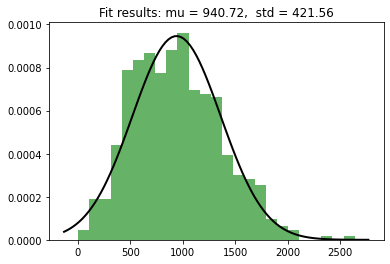

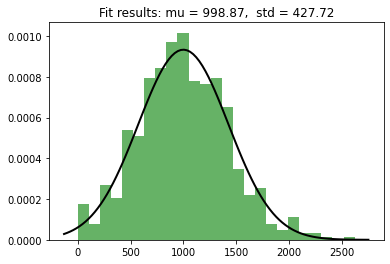

In [ ]:
# Last player as boundary = True
fitNormalDist(areaT1)
fitNormalDist(areaT2)

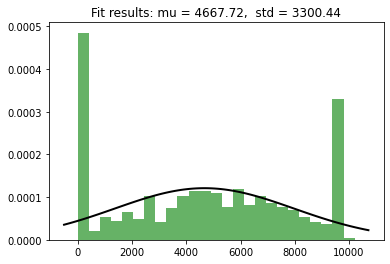

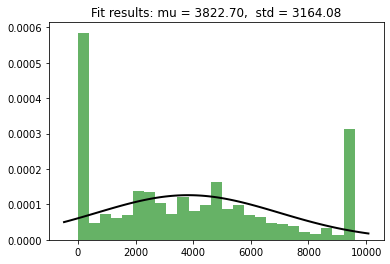

In [ ]:
# Last player as boundary = False
fitNormalDist(areaT1)
fitNormalDist(areaT2)

In [ ]:
#import seaborn as sns
#sns.distplot(areaT1, fit=norm, kde=False, color='g', bins=25)

In [ ]:
# Method 2 - Defense at left and attack at right regardless of team
for iEvent in matchdata.keys():
    (fig,ax) = createPitch(120,80,'yards','gray')
    if len(matchdata[iEvent]['eventLoc']) > 0:      
        if matchdata[iEvent]['period']==1:
            if matchdata[iEvent]['possession'] == 'home':
                x = matchdata[iEvent]['eventLoc'][0]
                y = matchdata[iEvent]['eventLoc'][1]
                positionBall = plt.Circle((x,y),2,color="black")
                ax.add_patch(positionBall)

                for i in range(len(matchdata[iEvent]['homeLoc'])):
                    x=matchdata[iEvent]['homeLoc'][i][0]
                    y=matchdata[iEvent]['homeLoc'][i][1]
                    position = plt.Circle((x,y),2,color="red")
                    ax.add_patch(position)

                for j in range(len(matchdata[iEvent]['awayLoc'])):
                    x=matchdata[iEvent]['awayLoc'][j][0]
                    y=matchdata[iEvent]['awayLoc'][j][1]
                    position = plt.Circle((x,y),2,color="blue")
                    ax.add_patch(position)
            else:
                x = matchdata[iEvent]['eventLoc'][0]
                y = matchdata[iEvent]['eventLoc'][1]
                positionBall = plt.Circle((120-x,y),2,color="black")
                ax.add_patch(positionBall)

                for i in range(len(matchdata[iEvent]['homeLoc'])):
                    x=matchdata[iEvent]['homeLoc'][i][0]
                    y=matchdata[iEvent]['homeLoc'][i][1]
                    position = plt.Circle((120-x,y),2,color="red")
                    ax.add_patch(position)

                for j in range(len(matchdata[iEvent]['awayLoc'])):
                    x=matchdata[iEvent]['awayLoc'][j][0]
                    y=matchdata[iEvent]['awayLoc'][j][1]
                    position = plt.Circle((120-x,y),2,color="blue")
                    ax.add_patch(position)
                
        else:
            if matchdata[iEvent]['possession'] == 'home':
                x = matchdata[iEvent]['eventLoc'][0]
                y = matchdata[iEvent]['eventLoc'][1]
                positionBall = plt.Circle((120-x,y),2,color="black")
                ax.add_patch(positionBall)

                for i in range(len(matchdata[iEvent]['homeLoc'])):
                    x=matchdata[iEvent]['homeLoc'][i][0]
                    y=matchdata[iEvent]['homeLoc'][i][1]
                    position = plt.Circle((120-x,y),2,color="red")
                    ax.add_patch(position)

                for j in range(len(matchdata[iEvent]['awayLoc'])):
                    x=matchdata[iEvent]['awayLoc'][j][0]
                    y=matchdata[iEvent]['awayLoc'][j][1]
                    position = plt.Circle((120-x,y),2,color="blue")
                    ax.add_patch(position)
            else:
                x = matchdata[iEvent]['eventLoc'][0]
                y = matchdata[iEvent]['eventLoc'][1]
                positionBall = plt.Circle((x,y),2,color="black")
                ax.add_patch(positionBall)

                for i in range(len(matchdata[iEvent]['homeLoc'])):
                    x=matchdata[iEvent]['homeLoc'][i][0]
                    y=matchdata[iEvent]['homeLoc'][i][1]
                    position = plt.Circle((x,y),2,color="red")
                    ax.add_patch(position)

                for j in range(len(matchdata[iEvent]['awayLoc'])):
                    x=matchdata[iEvent]['awayLoc'][j][0]
                    y=matchdata[iEvent]['awayLoc'][j][1]
                    position = plt.Circle((x,y),2,color="blue")
                    ax.add_patch(position)

    fig.set_size_inches(10, 7)
    plt.show()
